In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('happiness.csv')

In [3]:
df

Unnamed: 0                   Country  Rank  HappinessScore   Family  \
0             0               Switzerland     1           7.587  1.34951   
1             1                   Iceland     2           7.561  1.40223   
2             2                   Denmark     3           7.527  1.36058   
3             3                    Norway     4           7.522  1.33095   
4             4                    Canada     5           7.427  1.32261   
..          ...                       ...   ...             ...      ...   
621         151                     Yemen   152           3.355  1.07300   
622         152                  Tanzania   153           3.303  0.99100   
623         153               South Sudan   154           3.254  0.60800   
624         154  Central African Republic   155           3.083  0.00000   
625         155                   Burundi   156           2.905  0.62700   

         GDP  HealthLifeExpectancy  Freedom  Trust_GovCorruption  Generosity  \
0    1.39651               0.94143  0.66557              0.41978     0.29678   
1    1.30232               0.94784  0.62877              0.14145     0.43630   
2    1.32548               0.87464  0.64938              0.48357     0.34139   
3    1.45900               0.88521  0.66973              0.36503     0.34699   
4    1.32629               0.90563  0.63297              0.32957     0.45811   
..       ...                   ...      ...                  ...         ...   
621  0.44200               0.34300  0.24400              0.06400     0.08300   
622  0.45500               0.38100  0.48100              0.09700     0.27000   
623  0.33700               0.17700  0.11200              0.10600     0.22400   
624  0.02400               0.01000  0.30500              0.03800     0.21800   
625  0.09100               0.14500  0.06500              0.07600     0.14900   

     Year      continent  
0    2015         Europe  
1    2015         Europe  
2    2015         Europe  
3    2015         Europe  
4    2015  North America  
..    ...            ...  
621  2018           Asia  
622  2018         Africa  
623  2018         Africa  
624  2018         Africa  
625  2018         Africa  

[626 rows x 12 columns]

## EDA

#### 1. stripplot continents on Happiness

Text(0.5, 0, 'Continents')

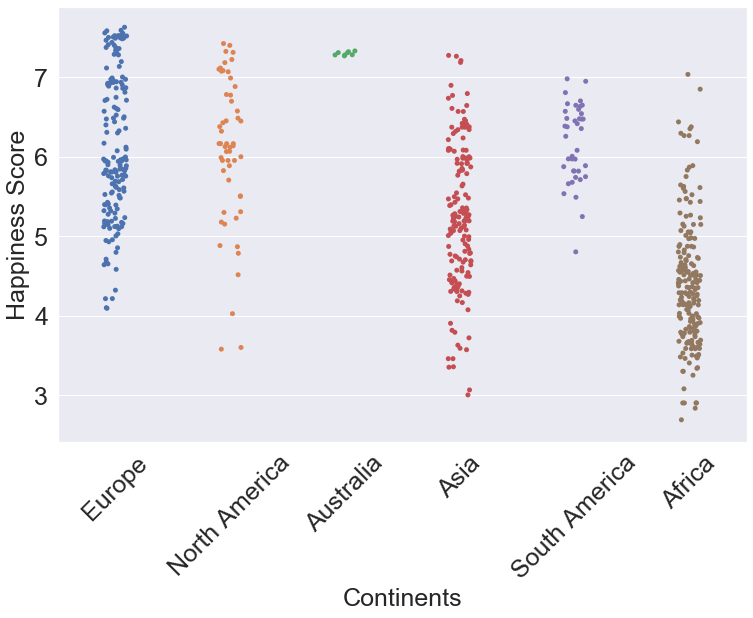

In [6]:
sns.set(rc={'figure.figsize':(11,8)})
sns.stripplot(x="continent", y="HappinessScore", data=df, jitter=True)
plt.xticks(rotation=45, size = 25)
plt.yticks(size =25)
plt.ylabel(ylabel = 'Happiness Score', size =25)
plt.xlabel(xlabel = 'Continents', size =25)

### 2. Barplot on continent on Happiness

Text(0.5, 0, 'Continents')

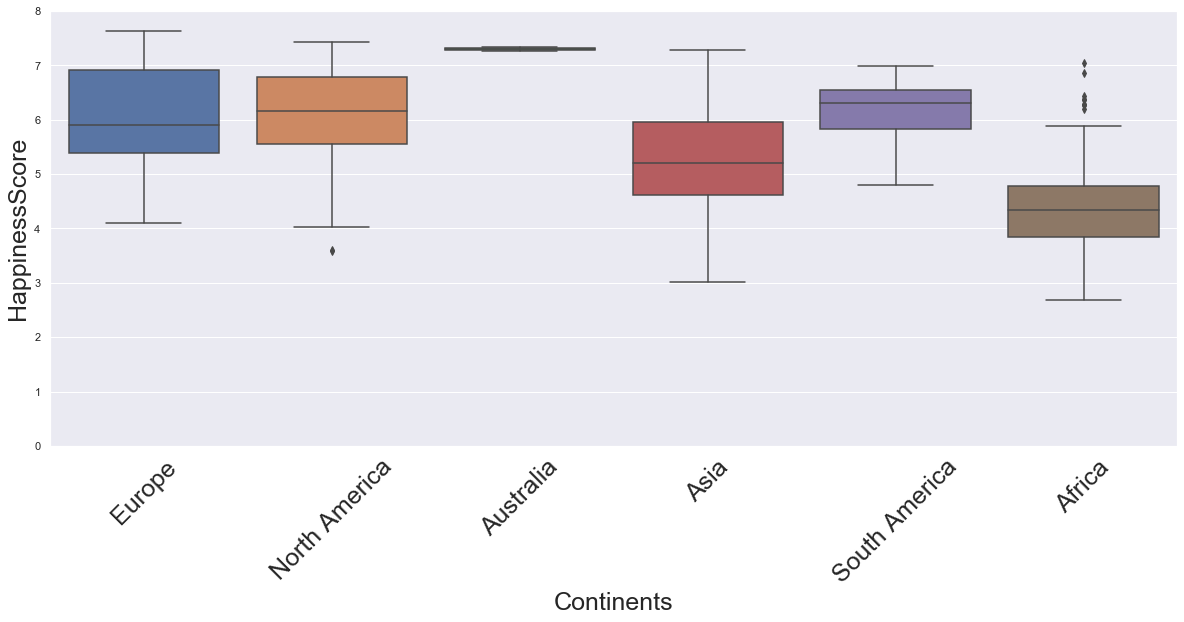

In [7]:
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x='continent', y="HappinessScore", data = df)
fig.axis(ymin=0, ymax=8)
plt.xticks(rotation=45, size = 25)
plt.ylabel(ylabel = 'HappinessScore', size = 25)
plt.xlabel(xlabel = 'Continents',size = 25)

### 3. Plotly interactive map-  country on happiness

In [9]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Rank'], 
           text = df['Country'],
           colorbar = {'title':'Rank'},
           colorscale = "blues")
layout = dict(title = 'Happiness Score From World Happiness Report Data From 2015-2018', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

### Selecting features

In [11]:
featureswithDV = ['HappinessScore', 'Family', 'GDP', 'HealthLifeExpectancy','Freedom', 'Trust_GovCorruption', 'Generosity']

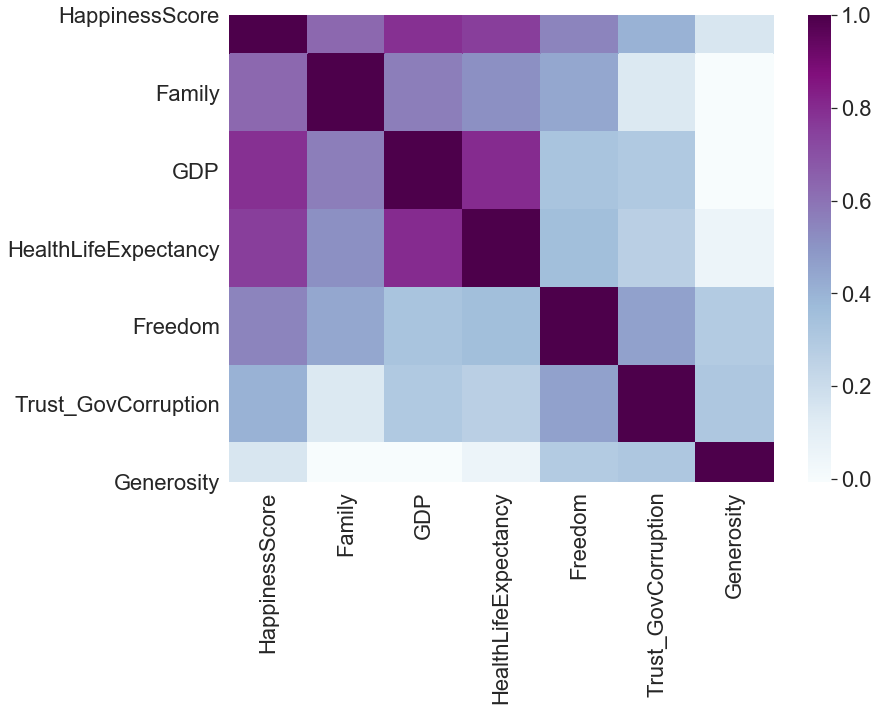

In [12]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set(font_scale=2)
sns.heatmap(df[featureswithDV].corr(), cmap = "BuPu", square = True)

# Assumptions for Linear Regression
1. Linearity
Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

In [15]:
features = ['Family', 'GDP', 'HealthLifeExpectancy','Freedom', 'Trust_GovCorruption', 'Generosity']

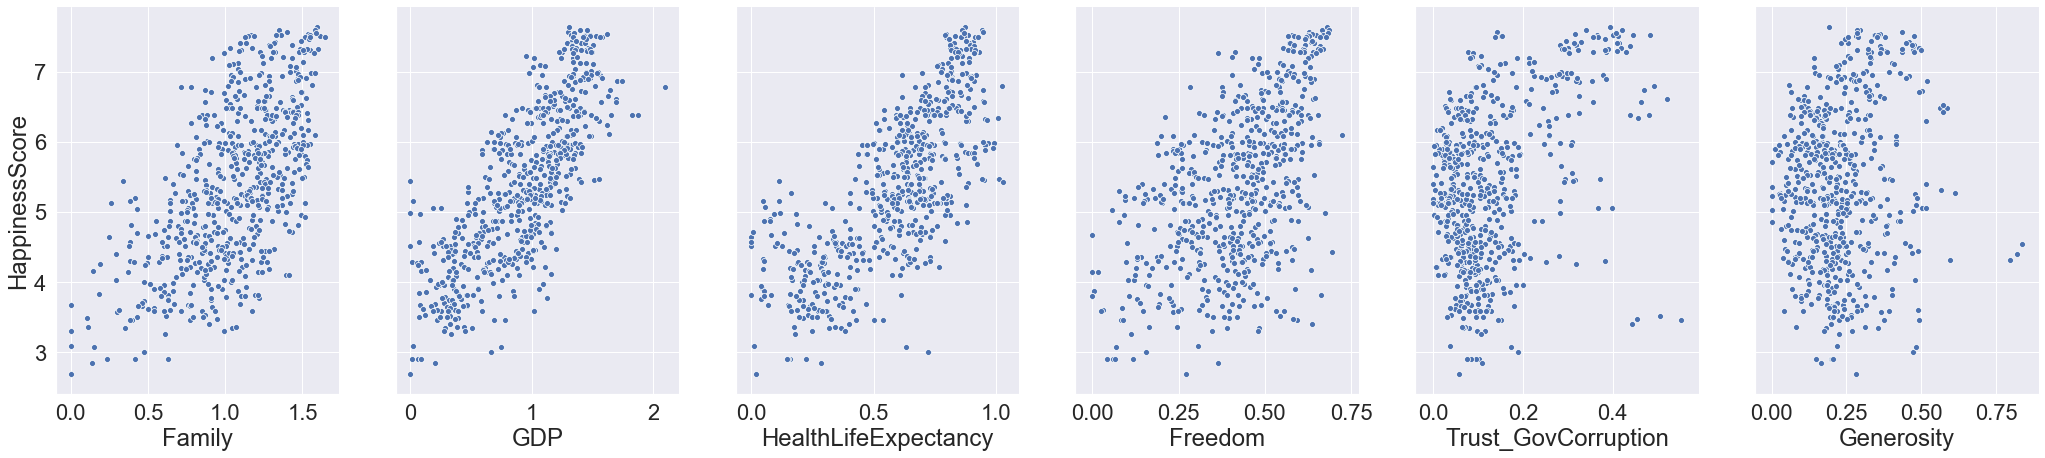

In [16]:
# visualize the relationship between the features and the response variable using scatterplots
p = sns.pairplot(df, x_vars=features, y_vars='HappinessScore', size=7, aspect=0.7)

[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Variables')]

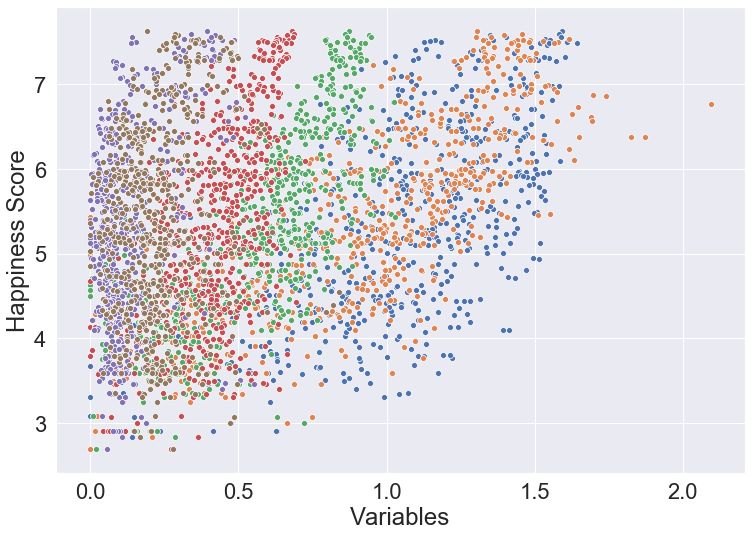

In [20]:
for col in df[features]:
    ax = sns.scatterplot(df[col], df['HappinessScore'])
ax.set(xlabel='Variables', ylabel='Happiness Score')

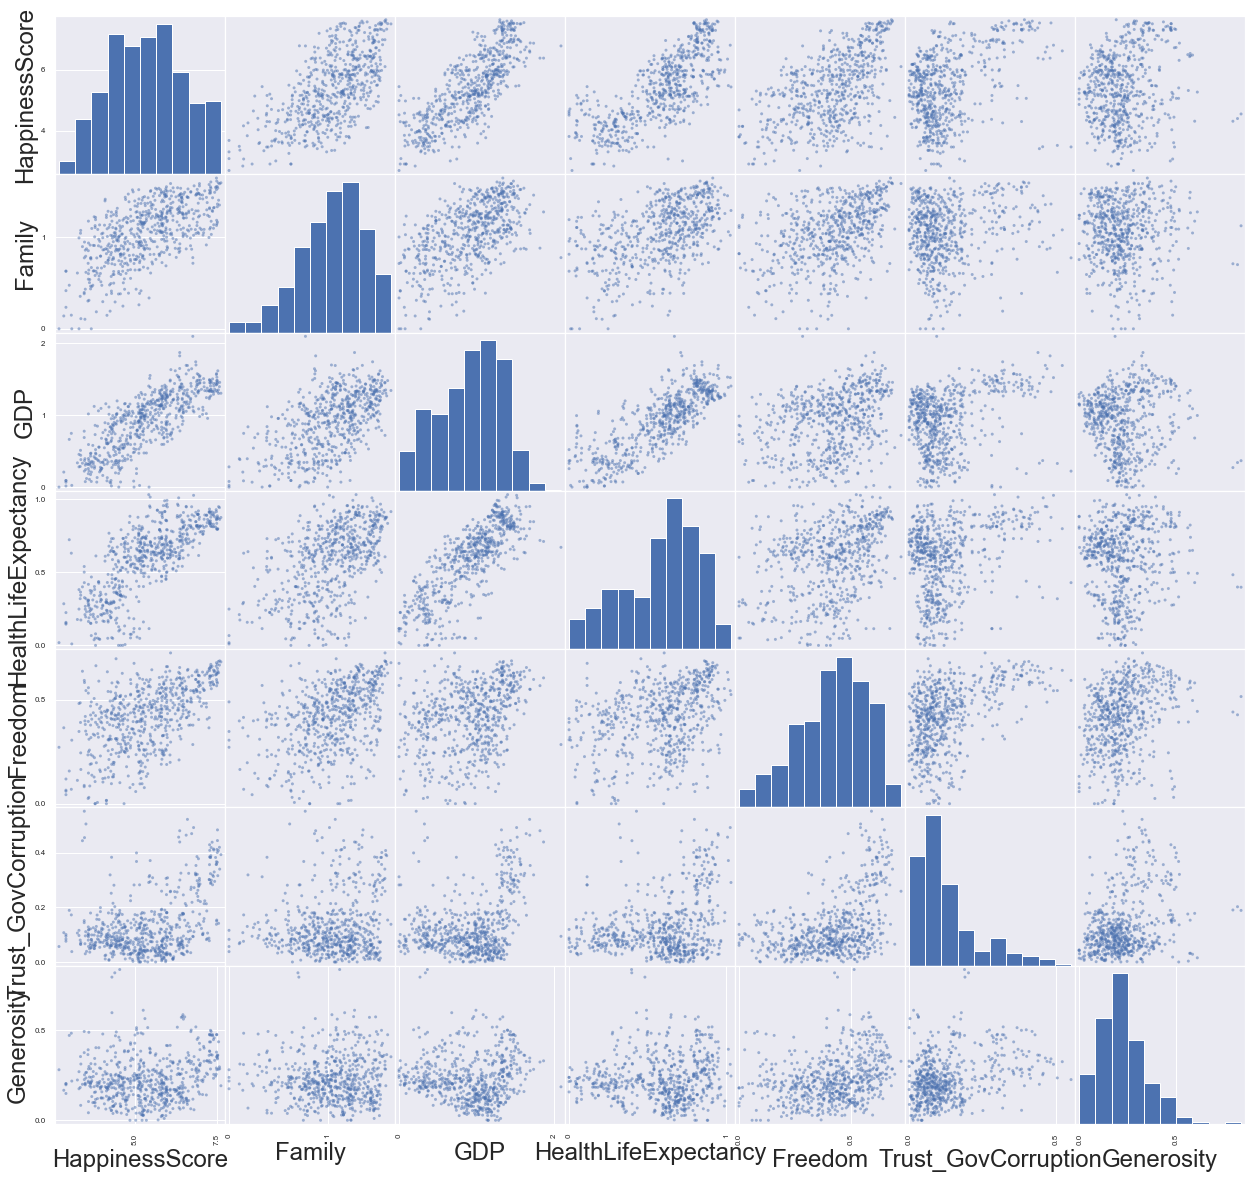

In [13]:
pd.plotting.scatter_matrix(df[featureswithDV], figsize=[19, 19]);

### We first examine the normality of all the variables, and check the linearity of the relationship between IVs and DV. looks like perception in corruption and generosity is not linear 

## Regression Model

In [21]:
reg_mult = ols(formula = "HappinessScore~GDP+Family+HealthLifeExpectancy+Freedom+Trust_GovCorruption+Generosity",data=df)

## Check the Homoscedasticity Assumption - qqplot


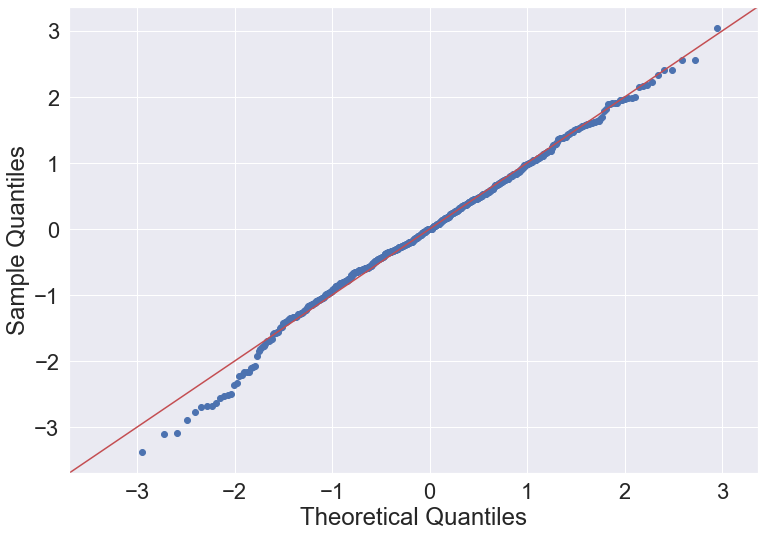

In [18]:
## Check the Homoscedasticity Assumption - qqplot
fig = sm.graphics.qqplot(reg_mult.resid, dist=stats.norm, line='45', fit=True)


Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms

## Check the Homoscedasticity Assumption - Residual plot


In [33]:
model_fit = ols(formula="HappinessScore~GDP+Family+HealthLifeExpectancy+Freedom+Trust_GovCorruption+Generosity",
                data=df).fit()

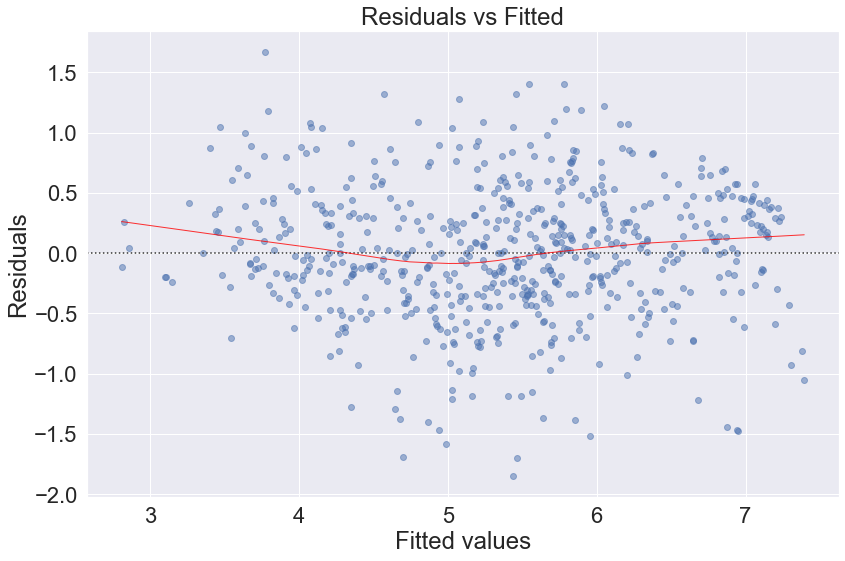

In [35]:
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'HappinessScore', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, 
#                                xy=(model_fitted_y[i], 
#                                    model_residuals[i]));


* it doesn't indicate the first model violate the homoscadecity assumption by qqplot and residual plot

## Multicollinearity using VIF higher value indicate strong mulicollinearity

In [29]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [36]:
calculate_vif(df[features])

Var    Vif
2  HealthLifeExpectancy  19.64
1                   GDP  19.54
0                Family  15.49
3               Freedom  12.98
5            Generosity   4.32
4   Trust_GovCorruption   3.48

#### We decided to drop Health life expectancy because it violated the multicollinearity assumptions. And it was highly correlated with GDP, r>0.8

## STEPWISE SELECTION

In [154]:
X = df[['GDP','Freedom','Family','Trust_GovCorruptionlog','Generositylog']]
y = df.loc[:,'HappinessScore']

In [40]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

438 188 438 188


In [157]:
stepwiseresult = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(stepwiseresult)

Add  GDP                            with p-value 2.99689e-96
Add  Freedom                        with p-value 1.74038e-30
Add  Family                         with p-value 8.83886e-09
Add  Generositylog                  with p-value 0.000440547
Add  Trust_GovCorruptionlog         with p-value 0.00337976
resulting features:
['GDP', 'Freedom', 'Family', 'Generositylog', 'Trust_GovCorruptionlog']


/Users/zoe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [158]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)


Coefficients: 
 [1.59867466 1.66080876 0.72821744 0.0987057  0.13970777]


In [159]:
predictions = lm.predict( X_test)


In [160]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4627951188235573
MSE: 0.3474104629295098
RMSE: 0.5894153568829962


Text(0, 0.5, 'Predicted Y')

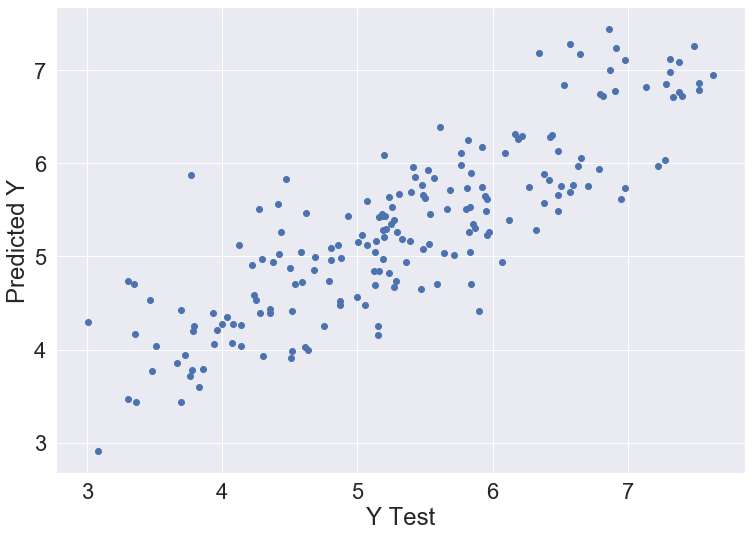

In [161]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [144]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
GDP                        1.598675
Freedom                    1.660809
Family                     0.728217
Trust_GovCorruptionlog     0.098706
Generositylog              0.139708

In [127]:
train1, test1= train_test_split(df, test_size=0.2, random_state=0)


In [129]:
reg_mult1 = ols(formula = "HappinessScore~GDP+Family+Freedom+Generositylog",data= train1).fit()
reg_mult1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     364.6
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          5.15e-146
Time:                        21:28:15   Log-Likelihood:                -420.30
No. Observations:                 500   AIC:                             850.6
Df Residuals:                     495   BIC:                             871.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.7419      0.117     23.521      0.000       2.513       2.971
GDP               1.6797      0.075     22.398      0.000       1.532       1.827
Family            0.5939      0.098      6.050      0.000       0.401       0.787
Freedom           1.7223      0.188      9.170      0.000       1.353       2.091
Generositylog     0.1481      0.039      3.772      0.000       0.071       0.225
==============================================================================
Omnibus:                        3.995   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.904
Skew:                          -0.159   Prob(JB):                        0.142
Kurtosis:                       3.293   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
reg_mult2 = ols(formula = "HappinessScore~GDP+Family+Freedom+Trust_GovCorruptionlog+",data=train1).fit()
reg_mult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     369.0
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          5.67e-147
Time:                        21:28:29   Log-Likelihood:                -418.07
No. Observations:                 500   AIC:                             846.1
Df Residuals:                     495   BIC:                             867.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.8360      0.124     22.819      0.000       2.592       3.080
GDP                        1.6217      0.075     21.672      0.000       1.475       1.769
Family                     0.6335      0.099      6.413      0.000       0.439       0.828
Freedom                    1.6475      0.190      8.661      0.000       1.274       2.021
Trust_GovCorruptionlog     0.1262      0.029      4.335      0.000       0.069       0.183
==============================================================================
Omnibus:                        7.926   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.974
Skew:                          -0.207   Prob(JB):                       0.0113
Kurtosis:                       3.509   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## log transformation on perception on corruption and generosity

In [50]:
df['Trust_GovCorruptionlog'] = df['Trust_GovCorruption'].map(lambda x: np.log(x))

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



In [51]:
df['Generositylog'] = df['Generosity'].map(lambda x: np.log(x))

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



In [163]:
df.replace([np.inf, -np.inf], 0, inplace=True)

## Regression with Continent- categorical variables

In [165]:
train1, test1= train_test_split(df, test_size=0.2, random_state=0)

In [168]:
reg_mult_con = ols(formula = "HappinessScore~GDP+Family+Freedom+Trust_GovCorruption+continent",data=train1).fit()
reg_mult_con.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     221.1
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          2.67e-166
Time:                        21:47:46   Log-Likelihood:                -358.08
No. Observations:                 500   AIC:                             736.2
Df Residuals:                     490   BIC:                             778.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.6340      0.084     31.393      0.000       2.469       2.799
continent[T.Asia]              0.1231      0.067      1.827      0.068      -0.009       0.255
continent[T.Australia]         0.8431      0.239      3.526      0.000       0.373       1.313
continent[T.Europe]            0.5062      0.078      6.461      0.000       0.352       0.660
continent[T.North America]     0.8079      0.093      8.646      0.000       0.624       0.991
continent[T.South America]     0.8706      0.104      8.339      0.000       0.665       1.076
GDP                            1.3239      0.081     16.273      0.000       1.164       1.484
Family                         0.4174      0.091      4.580      0.000       0.238       0.596
Freedom                        1.4364      0.182      7.913      0.000       1.080       1.793
Trust_GovCorruption            1.4487      0.248      5.845      0.000       0.962       1.936
==============================================================================
Omnibus:                       11.172   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.580
Skew:                          -0.196   Prob(JB):                     0.000414
Kurtosis:                       3.771   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### create dummy variables for continents

In [57]:
df_with_dummies = pd.get_dummies(df, prefix='continent', columns=['continent'])
df_with_dummies = df_with_dummies.rename(columns={'continent_North America': 'continent_North_America', 
                                   'continent_South America': 'continent_South_America'})

In [96]:
X4 = df_with_dummies[['GDP','Freedom','Family','Trust_GovCorruption','Generosity','continent_Africa', 'continent_Asia', 'continent_Australia',
       'continent_Europe', 'continent_North_America',
       'continent_South_America']]
y4 = df_with_dummies.loc[:,'HappinessScore']

train2, test2= train_test_split(df_with_dummies, test_size=0.2, random_state=0)


In [97]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [98]:
reg_with_continent = ols(formula="HappinessScore~GDP+Family+Freedom+Trust_GovCorruption+continent_Asia+continent_Australia+continent_Europe+continent_North_America+continent_South_America",data=train2).fit()
reg_with_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     221.1
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          2.67e-166
Time:                        17:47:29   Log-Likelihood:                -358.08
No. Observations:                 500   AIC:                             736.2
Df Residuals:                     490   BIC:                             778.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.6340      0.084     31.393      0.000       2.469       2.799
GDP                         1.3239      0.081     16.273      0.000       1.164       1.484
Family                      0.4174      0.091      4.580      0.000       0.238       0.596
Freedom                     1.4364      0.182      7.913      0.000       1.080       1.793
Trust_GovCorruption         1.4487      0.248      5.845      0.000       0.962       1.936
continent_Asia              0.1231      0.067      1.827      0.068      -0.009       0.255
continent_Australia         0.8431      0.239      3.526      0.000       0.373       1.313
continent_Europe            0.5062      0.078      6.461      0.000       0.352       0.660
continent_North_America     0.8079      0.093      8.646      0.000       0.624       0.991
continent_South_America     0.8706      0.104      8.339      0.000       0.665       1.076
==============================================================================
Omnibus:                       11.172   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.580
Skew:                          -0.196   Prob(JB):                     0.000414
Kurtosis:                       3.771   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
## final model AIC dropped from 1033 to 737, and R squared increased to 80%. It indicated it is a better model compared with others.


In [121]:
df.sort_values(by='Generosity', ascending=False).head()


Unnamed: 0    Country  Rank  HappinessScore    Family       GDP  \
428         113    Myanmar   114           4.545  1.123236  0.367111   
276         118    Myanmar   119           4.395  0.699810  0.341120   
128         128    Myanmar   129           4.307  0.709050  0.271080   
395          80  Indonesia    81           5.262  1.274445  0.995539   
599         129    Myanmar   130           4.308  1.174000  0.682000   

     HealthLifeExpectancy   Freedom  Trust_GovCorruption  Generosity  Year  \
428              0.397523  0.514492             0.188816    0.838075  2017   
276              0.398800  0.426920             0.202430    0.819710  2016   
128              0.482460  0.440170             0.190340    0.795880  2015   
395              0.492346  0.443323             0.015317    0.611705  2017   
599              0.429000  0.580000             0.178000    0.598000  2018   

    continent  Trust_GovCorruptionlog  Generositylog  
428      Asia               -1.666981      -0.176647  
276      Asia               -1.597361      -0.198805  
128      Asia               -1.658943      -0.228307  
395      Asia               -4.178783      -0.491506  
599      Asia               -1.725972      -0.514165

In [124]:
df.sort_values(by='Freedom', ascending=False).head()


Unnamed: 0     Country  Rank  HappinessScore  Family    GDP  \
513          43  Uzbekistan    44           6.096   1.584  0.719   
589         119    Cambodia   120           4.433   1.088  0.549   
471           1      Norway     2           7.594   1.582  1.456   
472           2     Denmark     3           7.555   1.590  1.351   
470           0     Finland     1           7.632   1.592  1.305   

     HealthLifeExpectancy  Freedom  Trust_GovCorruption  Generosity  Year  \
513                 0.605    0.724                0.259       0.328  2018   
589                 0.457    0.696                0.065       0.256  2018   
471                 0.861    0.686                0.340       0.286  2018   
472                 0.868    0.683                0.408       0.284  2018   
470                 0.874    0.681                0.393       0.192  2018   

    continent  Trust_GovCorruptionlog  Generositylog  
513      Asia               -1.350927      -1.114742  
589      Asia               -2.733368      -1.362578  
471    Europe               -1.078810      -1.251763  
472    Europe               -0.896488      -1.258781  
470    Europe               -0.933946      -1.650260

In [125]:
df.sort_values(by='HealthLifeExpectancy', ascending=False).head()


Unnamed: 0    Country  Rank  HappinessScore   Family      GDP  \
545          75  Hong Kong    76           5.430  1.29000  1.40500   
23           23  Singapore    24           6.798  1.02000  1.52186   
71           71  Hong Kong    72           5.474  1.05818  1.38604   
503          33  Singapore    34           6.343  1.45100  1.52900   
45           45      Japan    46           5.987  1.25712  1.27074   

     HealthLifeExpectancy  Freedom  Trust_GovCorruption  Generosity  Year  \
545               1.03000  0.52400              0.29100     0.24600  2018   
23                1.02525  0.54252              0.49210     0.31105  2015   
71                1.01328  0.59608              0.37124     0.39478  2015   
503               1.00800  0.63100              0.45700     0.26100  2018   
45                0.99111  0.49615              0.18060     0.10705  2015   

    continent  Trust_GovCorruptionlog  Generositylog  
545    Africa               -1.234432      -1.402424  
23       Asia               -0.709073      -1.167802  
71     Africa               -0.990907      -0.929427  
503      Asia               -0.783072      -1.343235  
45       Asia               -1.711471      -2.234459